<a href="https://colab.research.google.com/github/Maryvictor/tcc/blob/vers%C3%A3o2/Vers%C3%A3o2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importação das bibliotecas para nos ajudar a fazer a limpeza de dados
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np


In [ ]:
df = pd.read_csv('AIH_M_2017.csv')

In [57]:
df.head() #para visualizar o começo do seu dataframe

,id,id_aih,cnes,cnes_nome,cnes_bairro,nascimento,idade,sexo,raca,nacionalidade,...,uf,procedimento_solicitado,mudou_prc_solicitado,procedimento_realizado,diag_principal,carater,modalidade_internacao,data_intern,data_saida,mot_saida
0,1,852616105147865201701M260290001M260290001,35,HOSPITAL MENDO SAMPAIO,CHARNECA,09/06/1977,39.0,M,SEM INFORMACAO,BRASIL,...,PE,0308020030 TRATAMENTO DE INTOXICACAO OU ENVENE...,NAO,0308020030 TRATAMENTO DE INTOXICACAO OU ENVENE...,F100 Transtornos mentais e comportamentais dev...,02-URGENCIA,02-HOSPITALAR,01/12/2016,23/12/2016,12-ALTA MELHORADO
1,2,852616105147865201701M260290001M260290001,35,HOSPITAL MENDO SAMPAIO,CHARNECA,09/06/1977,39.0,M,SEM INFORMACAO,BRASIL,...,PE,0308020030 TRATAMENTO DE INTOXICACAO OU ENVENE...,NAO,0308020030 TRATAMENTO DE INTOXICACAO OU ENVENE...,F100 Transtornos mentais e comportamentais dev...,02-URGENCIA,02-HOSPITALAR,01/12/2016,23/12/2016,12-ALTA MELHORADO
2,3,862616105147876201701M260290001M260290001,35,HOSPITAL MENDO SAMPAIO,CHARNECA,27/03/1972,44.0,M,SEM INFORMACAO,BRASIL,...,PE,0308020030 TRATAMENTO DE INTOXICACAO OU ENVENE...,NAO,0308020030 TRATAMENTO DE INTOXICACAO OU ENVENE...,F100 Transtornos mentais e comportamentais dev...,02-URGENCIA,02-HOSPITALAR,05/12/2016,14/12/2016,12-ALTA MELHORADO
3,4,862616105147876201701M260290001M260290001,35,HOSPITAL MENDO SAMPAIO,CHARNECA,27/03/1972,44.0,M,SEM INFORMACAO,BRASIL,...,PE,0308020030 TRATAMENTO DE INTOXICACAO OU ENVENE...,NAO,0308020030 TRATAMENTO DE INTOXICACAO OU ENVENE...,F100 Transtornos mentais e comportamentais dev...,02-URGENCIA,02-HOSPITALAR,05/12/2016,14/12/2016,12-ALTA MELHORADO
4,5,307772617100644730201701E260000001E260000001,396,HOSPITAL DAS CLINICAS,CIDADE UNIVERSITARIA,26/08/1995,21.0,M,BRANCA,BRASIL,...,PE,0409050148 REDESIGNAC?O SEXUAL NO SEXO MASCULINO,NAO,0409050148 REDESIGNAC?O SEXUAL NO SEXO MASCULINO,F640 Transexualismo,01-ELETIVO,02-HOSPITALAR,21/12/2016,24/12/2016,27-PERMANENCIA POR REOPERACAO


In [58]:
df.info() #para obter informações do seu dataframe
#Os dados inicias possuem 722526 entradas e 26 colunas(já foram modificadas)
#Não possuem dados nulos, mas existem tem colunas que estão com todos os dados 0 - ok
#Podemos deixar cnes como object 
#Coluna ibge tb deverá ser excluido -ok
#Tratar o campo da idade


<class 'pandas.core.frame.DataFrame'>
Int64Index: 722524 entries, 0 to 722525
Data columns (total 22 columns):
 #   Column                   Non-Null Count   Dtype   
---  ------                   --------------   -----   
 0   id                       722524 non-null  int64   
 1   id_aih                   722524 non-null  object  
 2   cnes                     722524 non-null  category
 3   cnes_nome                722524 non-null  object  
 4   cnes_bairro              722524 non-null  object  
 5   nascimento               722524 non-null  object  
 6   idade                    716159 non-null  float64 
 7   sexo                     722524 non-null  object  
 8   raca                     722524 non-null  object  
 9   nacionalidade            722524 non-null  object  
 10  bairro                   722524 non-null  object  
 11  municipio                722524 non-null  object  
 12  uf                       722524 non-null  object  
 13  procedimento_solicitado  722524 non-null  ob

In [59]:
df.describe() #para ver um descrição mais detalhada 


,id,idade
count,722524.000000,716159.000000
mean,361263.242242,41.195920
std,208575.665774,14.286733
min,1.000000,2.000000
25%,180631.750000,30.000000
50%,361262.500000,40.000000
75%,541895.250000,51.000000
max,722526.000000,81.000000


In [60]:
duplicados = df[df.duplicated(keep='first')] #identificar dados duplicados
print(duplicados)

Empty DataFrame
Columns: [id, id_aih, cnes, cnes_nome, cnes_bairro, nascimento, idade, sexo, raca, nacionalidade, bairro, municipio, uf, procedimento_solicitado, mudou_prc_solicitado, procedimento_realizado, diag_principal, carater, modalidade_internacao, data_intern, data_saida, mot_saida]
Index: []

[0 rows x 22 columns]


In [61]:
df.drop_duplicates(keep='first', inplace=True) #Remover os dados duplicados


In [64]:
#df.drop(["ibge", "diag_sec", "causa_compl", "causa_obito"], axis=1, inplace=True)#Remover colunas

In [ ]:
df.dropna(inplace=True)#excluir linhas com dados faltantes


In [ ]:
#Transformei o cnes em String
categorical_cols = ['cnes']
 
def to_type(DataFrame, columns, type):
    for col in columns:
        DataFrame[col] = DataFrame[col].astype(type)
 
to_type(df, categorical_cols, 'category')

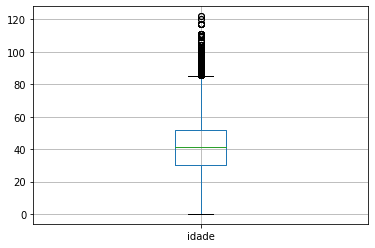

In [ ]:
df.boxplot(['idade'])

In [ ]:
def exclui_outliers(DataFrame, col_name): #limpeza dos outliers
  intervalo = 2.7*DataFrame[col_name].std()
  media = DataFrame[col_name].mean()
  DataFrame.loc[df[col_name] < (media - intervalo), col_name] = np.nan
  DataFrame.loc[df[col_name] > (media + intervalo), col_name] = np.nan

numerical_cols = ['idade']
for col in numerical_cols:
  exclui_outliers(df, col)

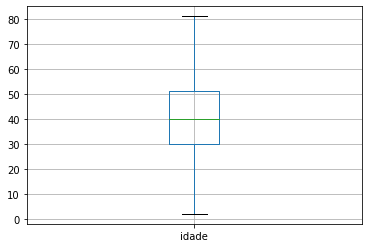

In [ ]:
df.boxplot(['idade'])

In [ ]:
df.columns

Index(['id', 'id_aih', 'cnes', 'cnes_nome', 'cnes_bairro', 'nascimento',
       'idade', 'sexo', 'raca', 'nacionalidade', 'bairro', 'municipio', 'uf',
       'procedimento_solicitado', 'mudou_prc_solicitado',
       'procedimento_realizado', 'diag_principal', 'carater',
       'modalidade_internacao', 'data_intern', 'data_saida', 'mot_saida'],
      dtype='object')

In [ ]:
df['cnes'].unique()

In [ ]:
df['cnes_nome'].unique()

In [ ]:
df['cnes_bairro'].unique()

In [ ]:
df['nascimento'].unique()

In [ ]:
df['idade'].unique() #limpar idade ou refazer

In [ ]:
df['sexo'].unique()

In [ ]:
df['raca'].unique()

In [ ]:
df['nacionalidade'].unique()

In [ ]:
df['bairro'].unique()

In [ ]:
df['municipio'].unique()

In [ ]:
df['uf'].unique()

In [ ]:
df['procedimento_solicitado'].unique() #è uma boa ideia separar esses dois

In [ ]:
df['mudou_prc_solicitado'].unique()

array(['NAO', 'SIM'], dtype=object)

In [ ]:
df['procedimento_realizado'].unique()

In [ ]:
df['carater'].unique()

array(['02-URGENCIA', '01-ELETIVO'], dtype=object)

In [ ]:
df['diag_principal'].unique()

In [ ]:
df['modalidade_internacao'].unique() #limpar essa linha com data

In [ ]:
df['mot_saida'].unique()

array(['12-ALTA MELHORADO', '27-PERMANENCIA POR REOPERACAO',
       '51-ENCERRAMENTO ADMINISTRATIVO', '18-ALTA POR OUTROS MOTIVOS',
       '26-PERMANENCIA POR MUDANCA DE PROCEDIMENTO',
       '31-TRANSFERENCIA PARA OUTRO ESTABELECIMENTO',
       '16-ALTA POR EVASAO', '14-ALTA A PEDIDO',
       '21-PERMANENCIA POR CARACTERISTICAS PROPRIAS DA DOENcA',
       '22-PERMANENCIA POR INTERCORRENCIA',
       '15-ALTA COM PREVISAO DE RETORNO PARA ACOMPANHAMENTO',
       '43-OBITO COM DECLARACAO FORNECIDA PELO SERVICO DE VERIFICACAO DE OBITO - SVO',
       '41-OBITO COM DECLARACAO FORNECIDA PELO MEDICO ASSISTENTE',
       '28-PERMANENCIA POR OUTROS MOTIVOS',
       '23-PERMANENCIA POR IMPOSSIBILIDADE SOCIO-FAMILIAR',
       '42-OBITO COM DECLARACAO FORNECIDA PELO INSTITUTO MEDICO LEGAL - IML',
       '19-ALTA DE PACIENTE AGUDO', '11-ALTA CURADO',
       '61-ALTA DA M?E/PUERPERA E DO RECEM-NASCIDO',
       '32-TRANFERENCIA PARA A INTERNAC?O DOMICILIAR',
       '25-PERMANENCIA POR PROCESSO DE DOACA